In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [2]:
weights = np.array([0, 0.4, 0.1])

## function to get the predicted value

In [3]:
def predict(data, weights):
    sum = np.dot(data, weights)
    if sum>=0:
        return 1
    else:
        return 0

## function to get the updated weights

In [4]:
error = 0
squared_error = 0
weights_list = []
def get_weights(data_matrix, y, weights, epochs, learn_rate):
    for e in range(epochs):
        squared_error = 0
        for i, j in zip(data_matrix, y):
            prediction = predict(i, weights)
            error = j - prediction
            squared_error += error**2
            weights = weights + learn_rate * i * error
        weights_list.append(weights)
        print('epoch:', e, 'squared_error:', squared_error)
        if squared_error == 0:
            break
    return weights_list            
    

In [5]:
def get_all_lines(new_weights, x_min, x_max):
    y_list = []
    for i in new_weights:
        y1 = -(i[1] * x_min + i[0])/i[2]
        y2 = -(i[1] * x_max + i[0])/i[2]
        y_list.append([y1, y2])
    return y_list    

## DATASET 1

In [6]:
datafile1 = pd.read_csv('datafile1.csv', header=None, names=['x1', 'x2', 'y'])

In [7]:
data_matrix1 = np.ones(datafile1.shape)
data_matrix1[:, 1] = datafile1.x1
data_matrix1[:, 2] = datafile1.x2
y_values = np.array(datafile1.y)

## plot to check if dataset is linearly separable

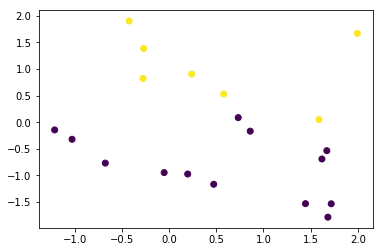

In [8]:
plt.scatter(x = datafile1.x1, y = datafile1.x2, c=datafile1.y)
plt.show()

In [9]:
new_weights = get_weights(data_matrix1, y_values, weights, 10, 0.01)

epoch: 0 squared_error: 9
epoch: 1 squared_error: 6
epoch: 2 squared_error: 5
epoch: 3 squared_error: 2
epoch: 4 squared_error: 0


## Ax + By + C = 0
## y = -(Ax+C)/B  where A,B are weights C is bias for y1  x will be x_min and for y2 it will be x_max

In [10]:
x_min = min(datafile1.x1)
x_max = max(datafile1.x1)

In [11]:
y1 = -(new_weights[-1][1] * x_min + new_weights[-1][0])/new_weights[-1][2]
y2 = -(new_weights[-1][1] * x_max + new_weights[-1][0])/new_weights[-1][2]

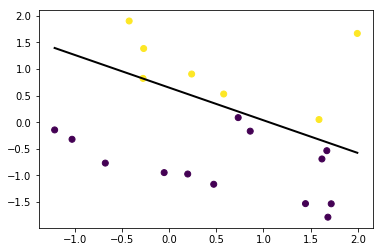

In [12]:
plt.scatter(x = datafile1.x1, y = datafile1.x2, c=datafile1.y)
plt.plot([x_min, x_max], [y1, y2], color='k', linestyle='-', linewidth = 2)
plt.show()

## animated plot

<IPython.core.display.Javascript object>


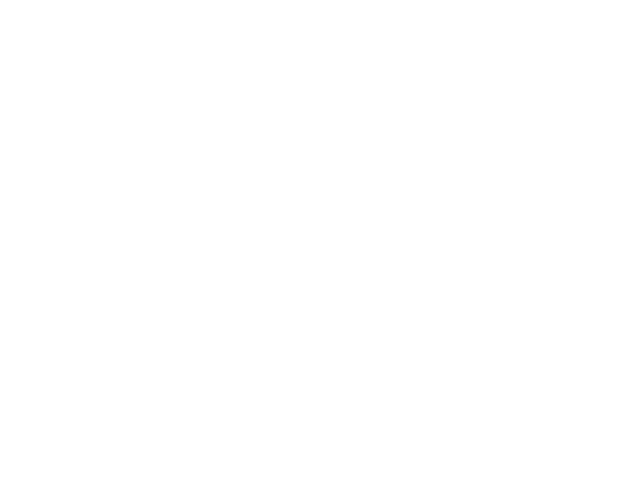

In [13]:
%matplotlib nbagg
fig, ax = plt.subplots()
y_list = get_all_lines(new_weights, x_min, x_max)
x = [x_min, x_max]       # x-array
line, = ax.plot(x, y_list[0])

def animate(i):
    line.set_ydata(y_list[i])  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10), init_func=init,
    interval=25, repeat_delay = 100, blit=True)
plt.scatter(x = datafile1.x1, y = datafile1.x2, c=datafile1.y)

plt.show()

## DATASET 2

In [13]:
datafile2 = pd.read_csv('datafile2.csv', header=None, names=['x1', 'x2', 'y'])

In [14]:
data_matrix2 = np.ones(datafile2.shape)
data_matrix2[:, 1] = datafile2.x1
data_matrix2[:, 2] = datafile2.x2
y_values = np.array(datafile2.y)

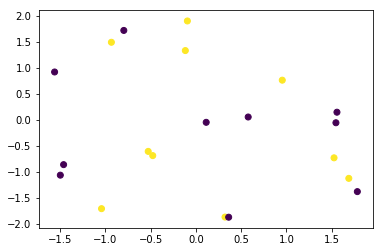

In [15]:
plt.scatter(x = datafile2.x1, y = datafile2.x2, c=datafile2.y)
plt.show()

In [19]:
new_weights = get_weights(data_matrix2, y_values, weights, 20, 0.1)

epoch: 0 squared_error: 13
epoch: 1 squared_error: 12
epoch: 2 squared_error: 13
epoch: 3 squared_error: 13
epoch: 4 squared_error: 13
epoch: 5 squared_error: 13
epoch: 6 squared_error: 13
epoch: 7 squared_error: 14
epoch: 8 squared_error: 14
epoch: 9 squared_error: 16
epoch: 10 squared_error: 15
epoch: 11 squared_error: 14
epoch: 12 squared_error: 16
epoch: 13 squared_error: 14
epoch: 14 squared_error: 14
epoch: 15 squared_error: 14
epoch: 16 squared_error: 12
epoch: 17 squared_error: 13
epoch: 18 squared_error: 13
epoch: 19 squared_error: 13


In [20]:
x_min = min(datafile2.x1)
x_max = max(datafile2.x1)

In [21]:
y1 = -(new_weights[-1][1] * x_min + new_weights[-1][0])/new_weights[-1][2]
y2 = -(new_weights[-1][1] * x_max + new_weights[-1][0])/new_weights[-1][2]

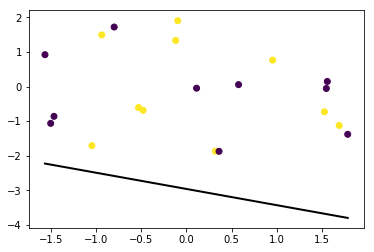

In [22]:
plt.scatter(x = datafile2.x1, y = datafile2.x2, c=datafile2.y)
plt.plot([x_min, x_max], [y1, y2], color='k', linestyle='-', linewidth = 2)
plt.show()

## animated plot

<IPython.core.display.Javascript object>


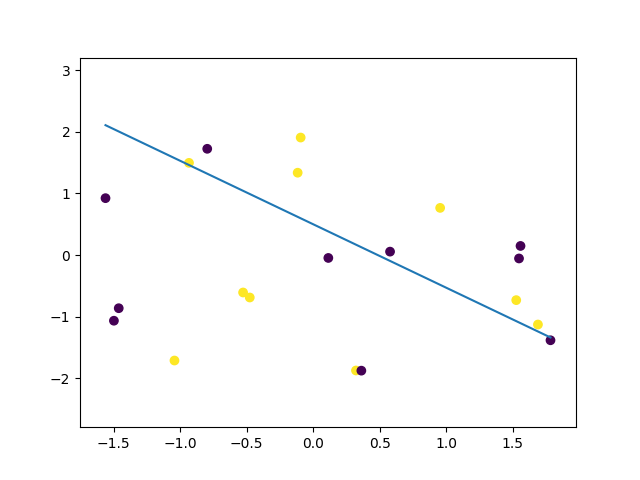

In [47]:
%matplotlib nbagg
fig, ax = plt.subplots()
y_list = get_all_lines(new_weights, x_min, x_max)
x = [x_min, x_max]       # x-array
line, = ax.plot(x, y_list[0])

def animate(i):
    line.set_ydata(y_list[i])  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10), init_func=init,
    interval=25, repeat_delay = 100, blit=True)
plt.scatter(x = datafile2.x1, y = datafile2.x2, c=datafile2.y)

plt.show()

## DATASET 3

In [49]:
datafile3 = pd.read_csv('datafile3.csv', header=None, names=['x1', 'x2', 'y'])

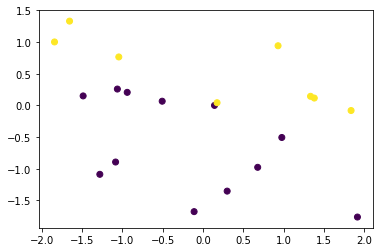

In [50]:
plt.scatter(x = datafile3.x1, y = datafile3.x2, c=datafile3.y)
plt.show()

In [51]:
data_matrix3 = np.ones(datafile3.shape)
data_matrix3[:, 1] = datafile3.x1
data_matrix3[:, 2] = datafile3.x2
y_values = np.array(datafile3.y)

In [56]:
new_weights = get_weights(data_matrix3, y_values, weights, 50, 0.01)

epoch: 0 squared_error: 7
epoch: 1 squared_error: 7
epoch: 2 squared_error: 5
epoch: 3 squared_error: 3
epoch: 4 squared_error: 2
epoch: 5 squared_error: 0


In [26]:
x_min = min(datafile3.x1)
x_max = max(datafile3.x1)

In [27]:
y1 = -(new_weights[-1][1] * x_min + new_weights[-1][0])/new_weights[-1][2]
y2 = -(new_weights[-1][1] * x_max + new_weights[-1][0])/new_weights[-1][2]

In [28]:
plt.scatter(x = datafile3.x1, y = datafile3.x2, c=datafile3.y)
plt.plot([x_min, x_max], [y1, y2], color='k', linestyle='-', linewidth = 2)
plt.show()

## animated plot

<IPython.core.display.Javascript object>


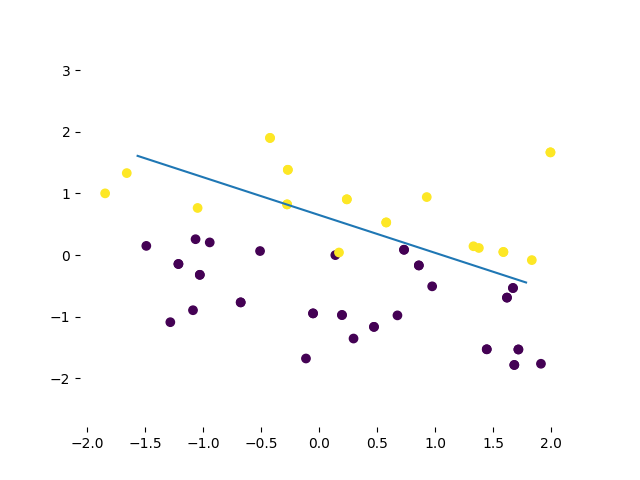

In [48]:
%matplotlib nbagg
fig, ax = plt.subplots()
y_list = get_all_lines(new_weights, x_min, x_max)
x = [x_min, x_max]       # x-array
line, = ax.plot(x, y_list[0])

def animate(i):
    line.set_ydata(y_list[i])  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10), init_func=init)
plt.scatter(x = datafile3.x1, y = datafile3.x2, c=datafile3.y)

plt.show()

## DATASET 4

In [33]:
datafile4 = pd.read_csv('datafile4.csv', header=None, names=['x1', 'x2', 'y'])

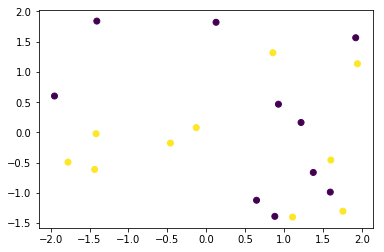

In [46]:
plt.scatter(x = datafile4.x1, y = datafile4.x2, c=datafile4.y)
plt.show()

In [35]:
data_matrix4 = np.ones(datafile4.shape)
data_matrix4[:, 1] = datafile4.x1
data_matrix4[:, 2] = datafile4.x2
y_values = np.array(datafile4.y)

In [40]:
new_weights = get_weights(data_matrix4, y_values, weights, 10, 0.1)

epoch: 0 squared_error: 10
epoch: 1 squared_error: 11
epoch: 2 squared_error: 9
epoch: 3 squared_error: 9
epoch: 4 squared_error: 10
epoch: 5 squared_error: 9
epoch: 6 squared_error: 10
epoch: 7 squared_error: 12
epoch: 8 squared_error: 8
epoch: 9 squared_error: 8


In [41]:
x_min = min(datafile4.x1)
x_max = max(datafile4.x1)

In [42]:
y1 = -(new_weights[-1][1] * x_min + new_weights[-1][0])/new_weights[-1][2]
y2 = -(new_weights[-1][1] * x_max + new_weights[-1][0])/new_weights[-1][2]

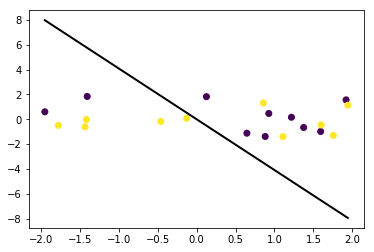

In [43]:
plt.scatter(x = datafile4.x1, y = datafile4.x2, c=datafile4.y)
plt.plot([x_min, x_max], [y1, y2], color='k', linestyle='-', linewidth = 2)
plt.show()

## animated plot

<IPython.core.display.Javascript object>


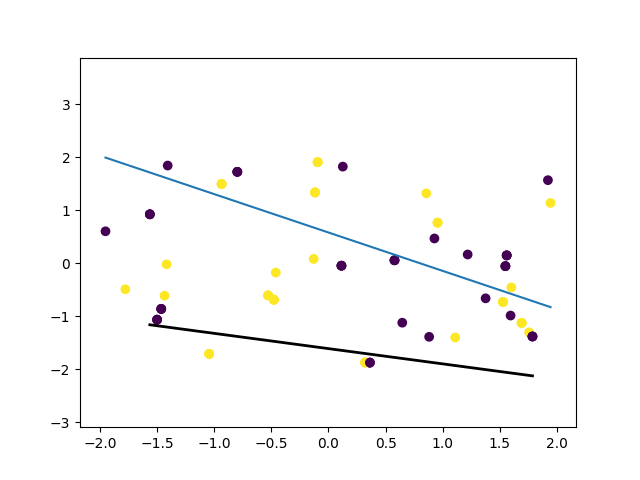

In [37]:
%matplotlib nbagg
fig, ax = plt.subplots()
y_list = get_all_lines(new_weights, x_min, x_max)
x = [x_min, x_max]       # x-array
line, = ax.plot(x, y_list[0])

def animate(i):
    line.set_ydata(y_list[i])  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 10), init_func=init,
    interval=25, repeat_delay = 100, blit=True)
plt.scatter(x = datafile4.x1, y = datafile4.x2, c=datafile4.y)

plt.show()